## "Прихотливая (причудливая)" индексация
## fancy indexing
Вместо скалярных значений передаются массивы индексов
Что дает возможность очень быстрого доступа и модификации сложных подмножеств значений массива

In [ ]:
Суть прихотливой индексации заключается в передаче массива индексов с целью одновременного доступа к нескольким эл-там массива

In [1]:
import numpy as np

In [9]:
rand = np.random.RandomState(42)  # установили нач. значение рандомайзера

In [10]:
rand

RandomState(MT19937) at 0x249F33A3740

In [11]:
x = rand.randint(100, size=10)

In [12]:
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [13]:
# обычный способ обращения к нескольким эл-там
[x[3], x[7], x[2]]

[71, 86, 14]

In [14]:
ind = [3, 7, 4]  # список индексов

In [15]:
x[ind]  # прихотливая индексация

array([71, 86, 60])

In [ ]:
Форма результата отражает форму массива индексов, а не форму индексируемого массива

In [16]:
ind = np.array([[3,7],
                [4,5]])

In [17]:
x[ind]

array([[71, 86],
       [60, 20]])

In [18]:
X = np.arange(12).reshape((3,4))

In [19]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [20]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]  # первый индекс - строка, второй - столбец
# пары индексов X[0, 2] X[1, 1] X[2, 3] подчиняются правилам транслирования массивов

array([ 2,  5, 11])

In [21]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [22]:
# каждое строчное значение соединяется с каждым вектором-столбцом точно так же, как при транслировании арифметических операций
row[:, np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

##### Возвращаемое значение отражает транслируемую форму индексов, а не форму индексируемого массива!!!

### Комбинированная индексация:

In [23]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [24]:
X[2, [2, 0, 1]]  # где 2 - это номер строки
# совместное использование простой и прихотливой индексации

array([10,  8,  9])

In [25]:
X[1:, [2, 0, 1]]  # совместное использование прихотливой индексации и срезов

array([[ 6,  4,  5],
       [10,  8,  9]])

In [26]:
# одновременное использование прихотливой индексации и МАСКИРОВАНИя
mask = np.array([1, 0, 1, 0], dtype=bool)

In [27]:
mask

array([ True, False,  True, False])

In [28]:
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [29]:
row

array([0, 1, 2])

### Пример: выборка случайных точек

In [30]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

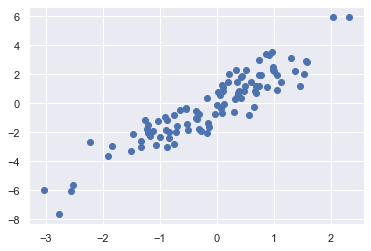

In [33]:
plt.scatter(X[:, 0], X[:, 1])

In [34]:
ind = np.random.choice(X.shape[0], 20, replace=False)
ind

array([92, 39, 79, 95, 55, 70, 62, 43, 58, 26, 75, 54,  7, 83, 16, 53,  1,
       23, 60, 21])

In [35]:
selection = X[ind]
selection

array([[ 0.12065651,  1.13236323],
       [-0.90649669, -0.93486441],
       [-0.31332021, -1.7895623 ],
       [-0.69144553, -1.56919875],
       [ 0.69226246,  1.21504303],
       [-1.16586444, -2.24482237],
       [ 0.10259314,  1.24690575],
       [ 0.37785618,  0.51409383],
       [ 0.42044896,  1.85189522],
       [ 0.32124996,  0.33137032],
       [-1.03637857, -1.18469125],
       [-0.34226126, -1.10666237],
       [ 0.35282131,  1.49875397],
       [ 0.74577693,  1.95834451],
       [-3.0236127 , -6.00766046],
       [ 0.6074983 ,  1.47089233],
       [ 0.7376352 ,  1.21236921],
       [-1.11518048, -1.87508012],
       [-1.83106042, -2.91352836],
       [ 0.99305043,  2.54294059]])

In [36]:
selection.shape

(20, 2)

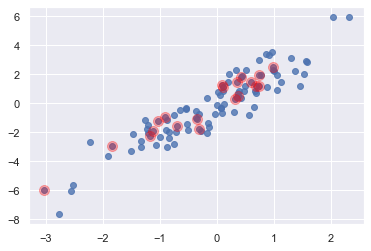

In [50]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.8)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='red', s=100, alpha=0.3)
# X[:, 0] - первый столбец - это координаты по х
# X[:, 1] - второй столбец - это координаты оп у
# подобная стратегия часто используется для быстрого секционирования наборов данных, часто требуемого при разделении 
# на обучающую/тестовую последовательности для проверки статистических моделей

### Изменение значений с помощью прихотливой индексации

In [51]:
x = np.arange(10)

In [53]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
i = np.array([2, 1, 8, 4])

In [55]:
x[i] = 99

In [56]:
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [57]:
x[i] -= 10  # сработает любой оператор присваивания

In [58]:
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [59]:
# повторные индексы присваиваются по порядку:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [ ]:
# при этом инкрементация не выполнилась несколько раз, она как бы запомнила начальные данные,
# и провела все операции с ними по отдельности

In [ ]:
# если мы хотим реализовать инкремент пропорционально кол-ву вхождений индекса, 
# то следует использовать метод .at() или .reduceat() операции .add <==>+:

In [61]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

### Пример: Разбиение данных на интервалы

In [ ]:
# пусть есть 100 значений, необходимо понять как они распределяются по массиву интервалов

In [102]:
np.random.seed(42)
x = np.random.randn(100)

In [103]:
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [104]:
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

In [105]:
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [106]:
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [107]:
bins.size

20

In [108]:
counts.size

20

In [109]:
i = np.searchsorted(bins, x)

In [110]:
i

array([11, 10, 11, 13, 10, 10, 13, 11,  9, 11,  9,  9, 10,  6,  7,  9,  8,
       11,  8,  7, 13, 10, 10,  7,  9, 10,  8, 11,  9,  9,  9, 14, 10,  8,
       12,  8, 10,  6,  7, 10, 11, 10, 10,  9,  7,  9,  9, 12, 11,  7, 11,
        9,  9, 11, 12, 12,  8,  9, 11, 12,  9, 10,  8,  8, 12, 13, 10, 12,
       11,  9, 11, 13, 10, 13,  5, 12, 10,  9, 10,  6, 10, 11, 13,  9,  8,
        9, 12, 11,  9, 11, 10, 12,  9,  9,  9,  7, 11, 10, 10, 10],
      dtype=int64)

In [111]:
np.add.at(counts, i, 1)

In [112]:
counts

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

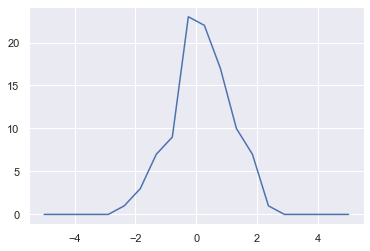

In [113]:
plt.plot(bins, counts)

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <BarContainer object of 19 artists>)

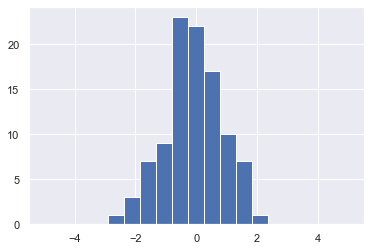

In [114]:
plt.hist(x, bins)